In [350]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

Load all files in results/experiment_1/params_and_metrics and createresults dataframe with data

In [351]:
# new empty DataFrame
results_df = pd.DataFrame()
# Find all files in params_and_metrics
files = os.listdir('params_and_metrics')
if files == []:
    raise ValueError("No files found in params_and_metrics directory.")
files.sort()
print(files)
for file in files:
    # Check if the file is a JSON file
    if file.endswith('.json'):
        # Read the JSON file
        with open(f"params_and_metrics/{file}", 'r') as f:
            data = json.load(f)
        
        # print data json formated
        # print(json.dumps(data, indent=4))

        # if data["SUB_EXPERIMENT_NUMBER"] in [4, 5, 6]:
        #     # Skip the file if the sub experiment number is 4, 5 or 6
        #     continue
        
        row = {
            "Experiment": data['EXPERIMENT_NUMBER'],
            "Sub Experiment": data['SUB_EXPERIMENT_NUMBER'],
            "Model": data['MODEL_NAME'],
            "Test_MAE": data["Metrics"]["Test"]['MAE'],
            "Test_MAPE": data["Metrics"]["Test"]['MAPE'],
            "Test_MSE": data["Metrics"]["Test"]['MSE'],
            "Test_RMSE": data["Metrics"]["Test"]['RMSE'],
            "C_Test_MAE": data["Metrics"]["Test_Repeat"]['MAE'],
            "C_Test_MAPE": data["Metrics"]["Test_Repeat"]['MAPE'],
            "C_Test_MSE": data["Metrics"]["Test_Repeat"]['MSE'],
            "C_Test_RMSE": data["Metrics"]["Test_Repeat"]['RMSE'],
            "Val_MAE": data["Metrics"]["Validation"]['MAE'],
            "Val_MAPE": data["Metrics"]["Validation"]['MAPE'],
            "Val_MSE": data["Metrics"]["Validation"]['MSE'],
            "Val_RMSE": data["Metrics"]["Validation"]['RMSE'],
            "C_Val_MAE": data["Metrics"]["Validation_Repeat"]['MAE'],
            "C_Val_MAPE": data["Metrics"]["Validation_Repeat"]['MAPE'],
            "C_Val_MSE": data["Metrics"]["Validation_Repeat"]['MSE'],
            "C_Val_RMSE": data["Metrics"]["Validation_Repeat"]['RMSE'],
            "Train_MAE": data["Metrics"]["Train"]['MAE'],
            "Train_MAPE": data["Metrics"]["Train"]['MAPE'],
            "Train_MSE": data["Metrics"]["Train"]['MSE'],
            "Train_RMSE": data["Metrics"]["Train"]['RMSE'],
            "C_Train_MAE": data["Metrics"]["Train_Repeat"]['MAE'],
            "C_Train_MAPE": data["Metrics"]["Train_Repeat"]['MAPE'],
            "C_Train_MSE": data["Metrics"]["Train_Repeat"]['MSE'],
            "C_Train_RMSE": data["Metrics"]["Train_Repeat"]['RMSE'],
            "Win_Input_Size": data["INPUT_WINDOW_SIZE"],
            "Win_Output_Size": data["OUTPUT_WINDOW_SIZE"],
            "Run_Moment": data["RUN_MOMENT"],
            "Random_Seed": data["RANDOM_SEED"],
        }

        if "TRAINING_EPOCHS" in data:
            row["Training_Epochs"] = data["TRAINING_EPOCHS"]
        else:
            # Check if the file has a corresponding history file
            history_file = f"histories/{file.replace('.json', '.csv')}"
            if os.path.exists(history_file):
                # Read the CSV file
                history_df = pd.read_csv(history_file)
                # print(len(history_df))
                row["Training_Epochs"] = len(history_df)
            else:
                row["Training_Epochs"] = None
        # Append the row to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
    else:
        # throw error if the file is not a json file
        raise ValueError(f"File {file} is not a JSON file.")

['2025-04-14 18:44:15-s1-m1.json', '2025-04-14 18:45:35-s1-m2.json', '2025-04-14 18:47:05-s1-m3.json', '2025-04-14 18:48:49-s2-m1.json', '2025-04-14 18:49:50-s2-m2.json', '2025-04-14 18:50:58-s2-m3.json', '2025-04-14 18:52:19-s3-m1.json', '2025-04-14 18:53:19-s3-m2.json', '2025-04-14 18:54:34-s3-m3.json', '2025-04-14 18:57:36-s4-m1.json', '2025-04-14 18:58:16-s4-m2.json', '2025-04-14 18:58:58-s4-m3.json', '2025-04-14 18:59:37-s5-m1.json', '2025-04-14 19:00:31-s5-m2.json', '2025-04-14 19:01:46-s5-m3.json', '2025-04-14 19:02:53-s6-m1.json', '2025-04-14 19:03:29-s6-m2.json', '2025-04-14 19:04:11-s6-m3.json', '2025-04-14 19:04:50-s7-m1.json', '2025-04-14 19:05:47-s7-m2.json', '2025-04-14 19:07:32-s7-m3.json', '2025-04-14 19:09:44-s8-m1.json', '2025-04-14 19:10:37-s8-m2.json', '2025-04-14 19:11:32-s8-m3.json', '2025-04-14 19:13:32-s9-m1.json', '2025-04-14 19:15:04-s9-m2.json', '2025-04-14 19:17:46-s9-m3.json', '2025-04-14 19:26:29-s1-m1.json', '2025-04-14 19:27:16-s1-m2.json', '2025-04-14 1

In [352]:
# Group by Sub Experiment, and calculate the mean of Test RMSE and Test MAPE
results_mean_df = results_df.groupby(['Sub Experiment'])[['Test_RMSE', 'Test_MAPE','Val_RMSE', 'Val_MAPE','Train_RMSE', 'Train_MAPE']].mean().reset_index()
results_mean_df = results_mean_df.sort_values(by=["Test_RMSE", "Test_MAPE"], ascending=[True, True])
display(results_mean_df)

,Sub Experiment,Test_RMSE,Test_MAPE,Val_RMSE,Val_MAPE,Train_RMSE,Train_MAPE
6,7,0.020301,1.884720,0.020253,1.912795,0.056068,64.834019
5,6,0.021617,5.037459,0.015665,3.819121,0.042664,42290.935547
3,4,0.021701,5.065243,0.015750,3.838007,0.042708,42194.548394
4,5,0.021701,5.067300,0.015763,3.842083,0.042704,42203.759332
1,2,0.028292,2.733135,0.030126,2.934378,0.090142,106.064186
0,1,0.028302,2.742277,0.030720,2.997904,0.114676,128.188848
8,9,0.030156,2.926034,0.032953,3.211865,0.141310,162.440619
7,8,0.030700,2.896496,0.033630,3.180826,0.144551,156.769870
2,3,0.034391,3.381680,0.039227,3.833738,0.128435,141.915765


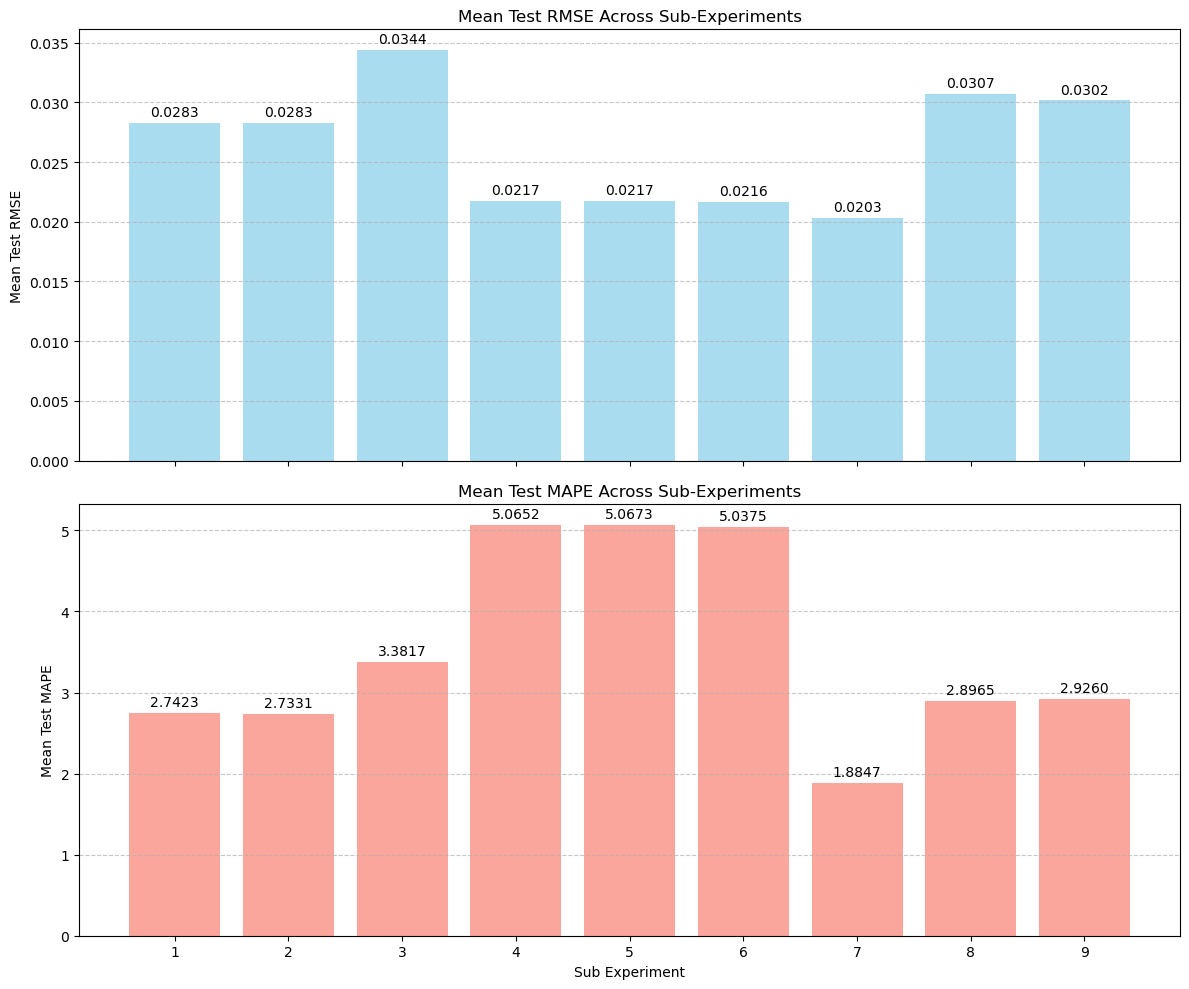

In [353]:
# Plot histograms of RMSE and MAPE using subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot RMSE
axes[0].bar(results_mean_df['Sub Experiment'], results_mean_df['Test_RMSE'], color='skyblue', alpha=0.7)
axes[0].set_title('Mean Test RMSE Across Sub-Experiments')
axes[0].set_ylabel('Mean Test RMSE')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add RMSE values as labels on the RMSE plot
for i, value in enumerate(results_mean_df['Test_RMSE']):
    axes[0].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Plot MAPE
axes[1].bar(results_mean_df['Sub Experiment'], results_mean_df['Test_MAPE'], color='salmon', alpha=0.7)
axes[1].set_title('Mean Test MAPE Across Sub-Experiments')
axes[1].set_xlabel('Sub Experiment')
axes[1].set_ylabel('Mean Test MAPE')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add MAPE values as labels on the MAPE plot
for i, value in enumerate(results_mean_df['Test_MAPE']):
    axes[1].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Set x-axis ticks to include all sub-experiment numbers
plt.xticks(results_mean_df['Sub Experiment'])

# Adjust layout
plt.tight_layout()
plt.show()

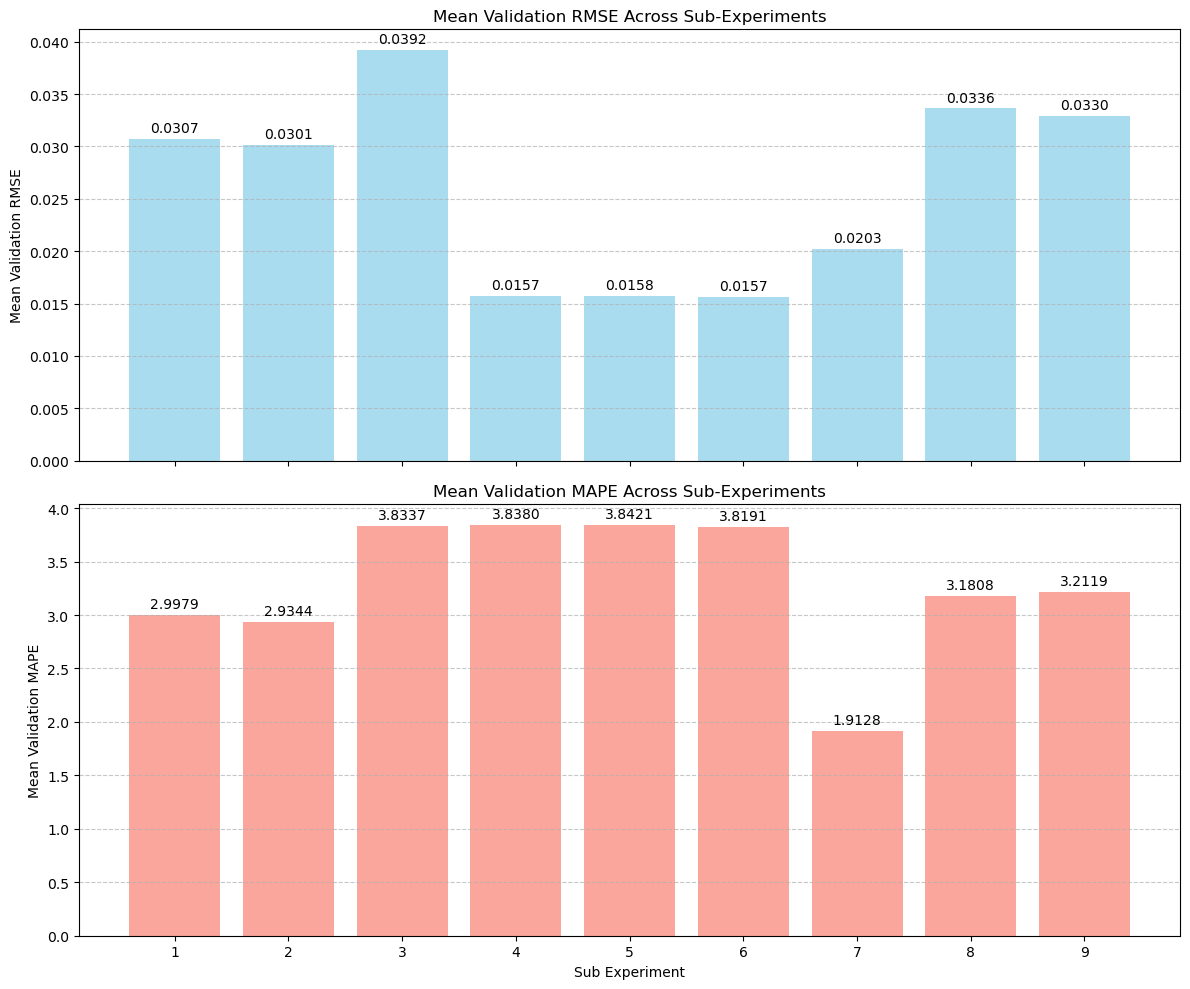

In [354]:
# Plot histograms of Val_RMSE and Val_MAPE using subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Val_RMSE
axes[0].bar(results_mean_df['Sub Experiment'], results_mean_df['Val_RMSE'], color='skyblue', alpha=0.7)
axes[0].set_title('Mean Validation RMSE Across Sub-Experiments')
axes[0].set_ylabel('Mean Validation RMSE')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add Val_RMSE values as labels on the Val_RMSE plot
for i, value in enumerate(results_mean_df['Val_RMSE']):
    axes[0].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Plot Val_MAPE
axes[1].bar(results_mean_df['Sub Experiment'], results_mean_df['Val_MAPE'], color='salmon', alpha=0.7)
axes[1].set_title('Mean Validation MAPE Across Sub-Experiments')
axes[1].set_xlabel('Sub Experiment')
axes[1].set_ylabel('Mean Validation MAPE')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add Val_MAPE values as labels on the Val_MAPE plot
for i, value in enumerate(results_mean_df['Val_MAPE']):
    axes[1].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Set x-axis ticks to include all sub-experiment numbers
plt.xticks(results_mean_df['Sub Experiment'])

# Adjust layout
plt.tight_layout()
plt.show()

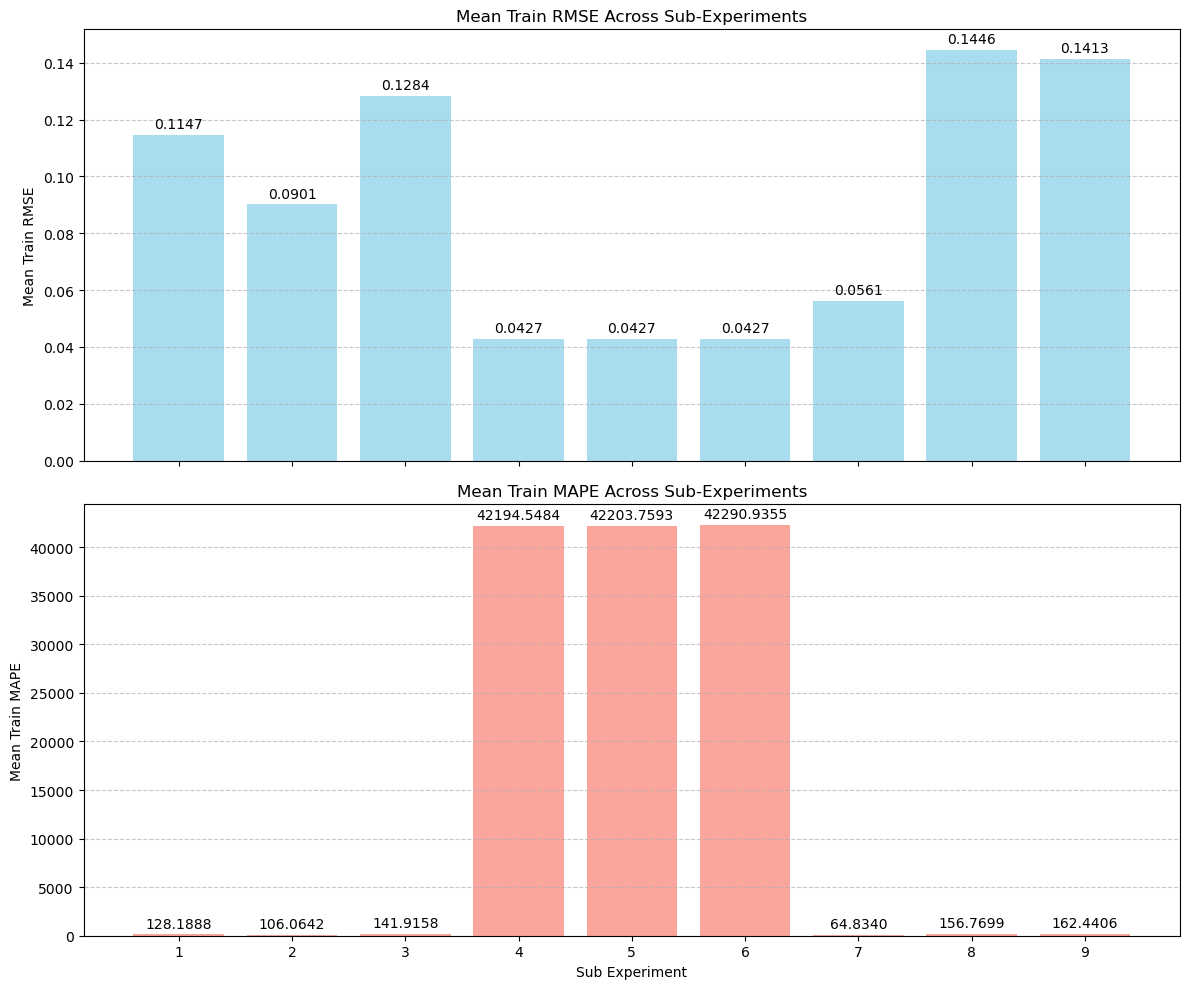

In [355]:
# Plot histograms of Train_RMSE and Train_MAPE using subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Train_RMSE
axes[0].bar(results_mean_df['Sub Experiment'], results_mean_df['Train_RMSE'], color='skyblue', alpha=0.7)
axes[0].set_title('Mean Train RMSE Across Sub-Experiments')
axes[0].set_ylabel('Mean Train RMSE')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add Train_RMSE values as labels on the Train_RMSE plot
for i, value in enumerate(results_mean_df['Train_RMSE']):
    axes[0].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Plot Train_MAPE
axes[1].bar(results_mean_df['Sub Experiment'], results_mean_df['Train_MAPE'], color='salmon', alpha=0.7)
axes[1].set_title('Mean Train MAPE Across Sub-Experiments')
axes[1].set_xlabel('Sub Experiment')
axes[1].set_ylabel('Mean Train MAPE')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add Train_MAPE values as labels on the Train_MAPE plot
for i, value in enumerate(results_mean_df['Train_MAPE']):
    axes[1].annotate(f"{value:.4f}", 
                     (results_mean_df['Sub Experiment'].iloc[i], value), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Set x-axis ticks to include all sub-experiment numbers
plt.xticks(results_mean_df['Sub Experiment'])

# Adjust layout
plt.tight_layout()
plt.show()

In [356]:
# Group by Win_Input_Size and Win_Output_Size, and calculate the mean of Test RMSE and Test MAPE
window_results_mean_df = results_df.groupby(['Win_Input_Size', 'Win_Output_Size', 'Sub Experiment'])[['Test_RMSE', 'Test_MAPE', 'Val_RMSE', 'Val_MAPE', 'Train_RMSE', 'Train_MAPE']].mean().reset_index()

# Sort the results for better visualization
# window_results_mean_df = window_results_mean_df.sort_values(by=["Test_RMSE", "Test_MAPE"], ascending=[True, True])
window_results_mean_df = window_results_mean_df.sort_values(by=["Win_Input_Size", "Win_Output_Size","Test_RMSE", "Test_MAPE"], ascending=[True, True, True, True])

# Display the grouped results
display(window_results_mean_df)

,Win_Input_Size,Win_Output_Size,Sub Experiment,Test_RMSE,Test_MAPE,Val_RMSE,Val_MAPE,Train_RMSE,Train_MAPE
6,4,1,7,0.009702,0.816473,0.008281,0.720449,0.023363,35.489368
0,4,1,1,0.011139,0.963934,0.010677,0.937159,0.028177,43.530325
7,4,1,8,0.011334,0.978152,0.010218,0.916423,0.023395,35.459324
1,4,1,2,0.015510,1.414396,0.015496,1.427001,0.037898,60.550560
2,4,1,3,0.015971,1.411180,0.017065,1.540412,0.037348,57.385152
3,4,1,4,0.020510,4.704314,0.015907,3.843173,0.042868,42225.045139
4,4,1,5,0.020522,4.712624,0.015932,3.850635,0.042879,42209.240451
5,4,1,6,0.020529,4.713303,0.015969,3.855517,0.042898,42165.548611
8,4,1,9,0.024003,2.348059,0.023678,2.314542,0.072995,102.223455
14,40,5,6,0.022705,5.361616,0.015361,3.782724,0.042429,42416.322483


Modify it to use "window_results_mean_df" as data source, and create 2 subplots for each combination of "Win_Input_Size" and "Win_Output_Size", creating as many sub plots as needed and ajusting the height of the figure as demanded. So we get 2 plot for each combination, showing Test_RMSE and Test_MAPE means for each sub experiment on each combination of input/output.

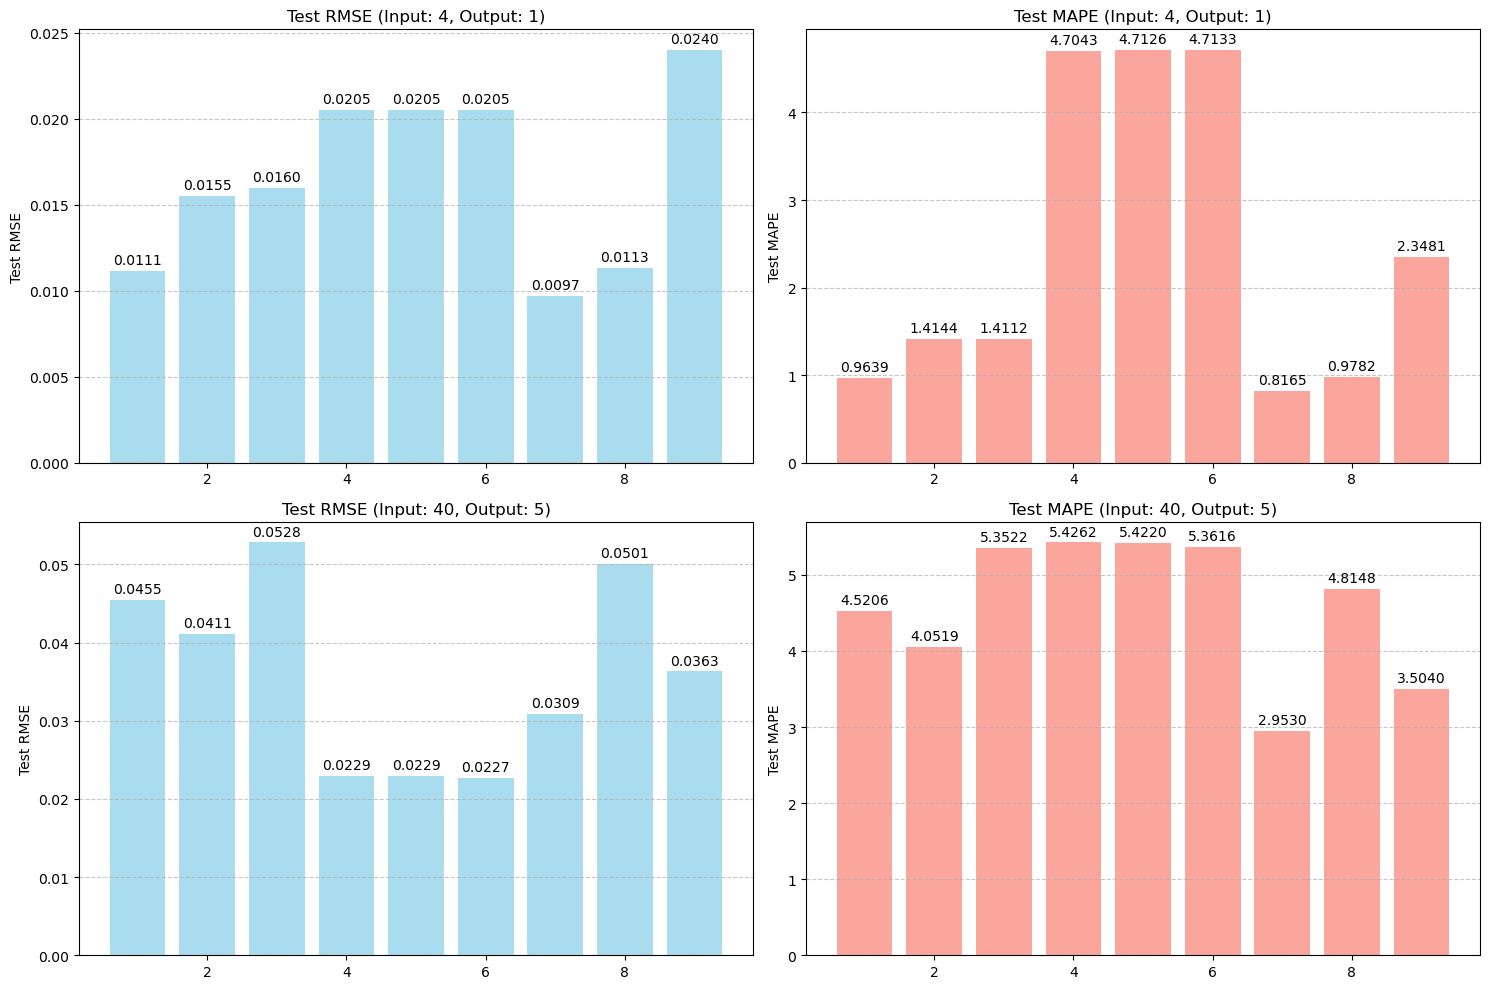

In [357]:
# Get unique combinations of Win_Input_Size and Win_Output_Size
unique_combinations = window_results_mean_df[['Win_Input_Size', 'Win_Output_Size']].drop_duplicates()

# Calculate the number of subplots needed
num_combinations = len(unique_combinations)
fig_height = 5 * num_combinations  # Adjust the height dynamically based on the number of combinations

# Create subplots
fig, axes = plt.subplots(num_combinations, 2, figsize=(15, fig_height), sharex=False)

# Iterate through each combination and plot
for idx, (win_input, win_output) in enumerate(unique_combinations.values):
    # Filter data for the current combination
    subset = window_results_mean_df[
        (window_results_mean_df['Win_Input_Size'] == win_input) &
        (window_results_mean_df['Win_Output_Size'] == win_output)
    ]
    
    # Plot Test_RMSE
    axes[idx, 0].bar(subset['Sub Experiment'], subset['Test_RMSE'], color='skyblue', alpha=0.7)
    axes[idx, 0].set_title(f'Test RMSE (Input: {win_input}, Output: {win_output})')
    axes[idx, 0].set_ylabel('Test RMSE')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Test_RMSE values as labels
    for i, value in enumerate(subset['Test_RMSE']):
        axes[idx, 0].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

    # Plot Test_MAPE
    axes[idx, 1].bar(subset['Sub Experiment'], subset['Test_MAPE'], color='salmon', alpha=0.7)
    axes[idx, 1].set_title(f'Test MAPE (Input: {win_input}, Output: {win_output})')
    axes[idx, 1].set_ylabel('Test MAPE')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Test_MAPE values as labels
    for i, value in enumerate(subset['Test_MAPE']):
        axes[idx, 1].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()


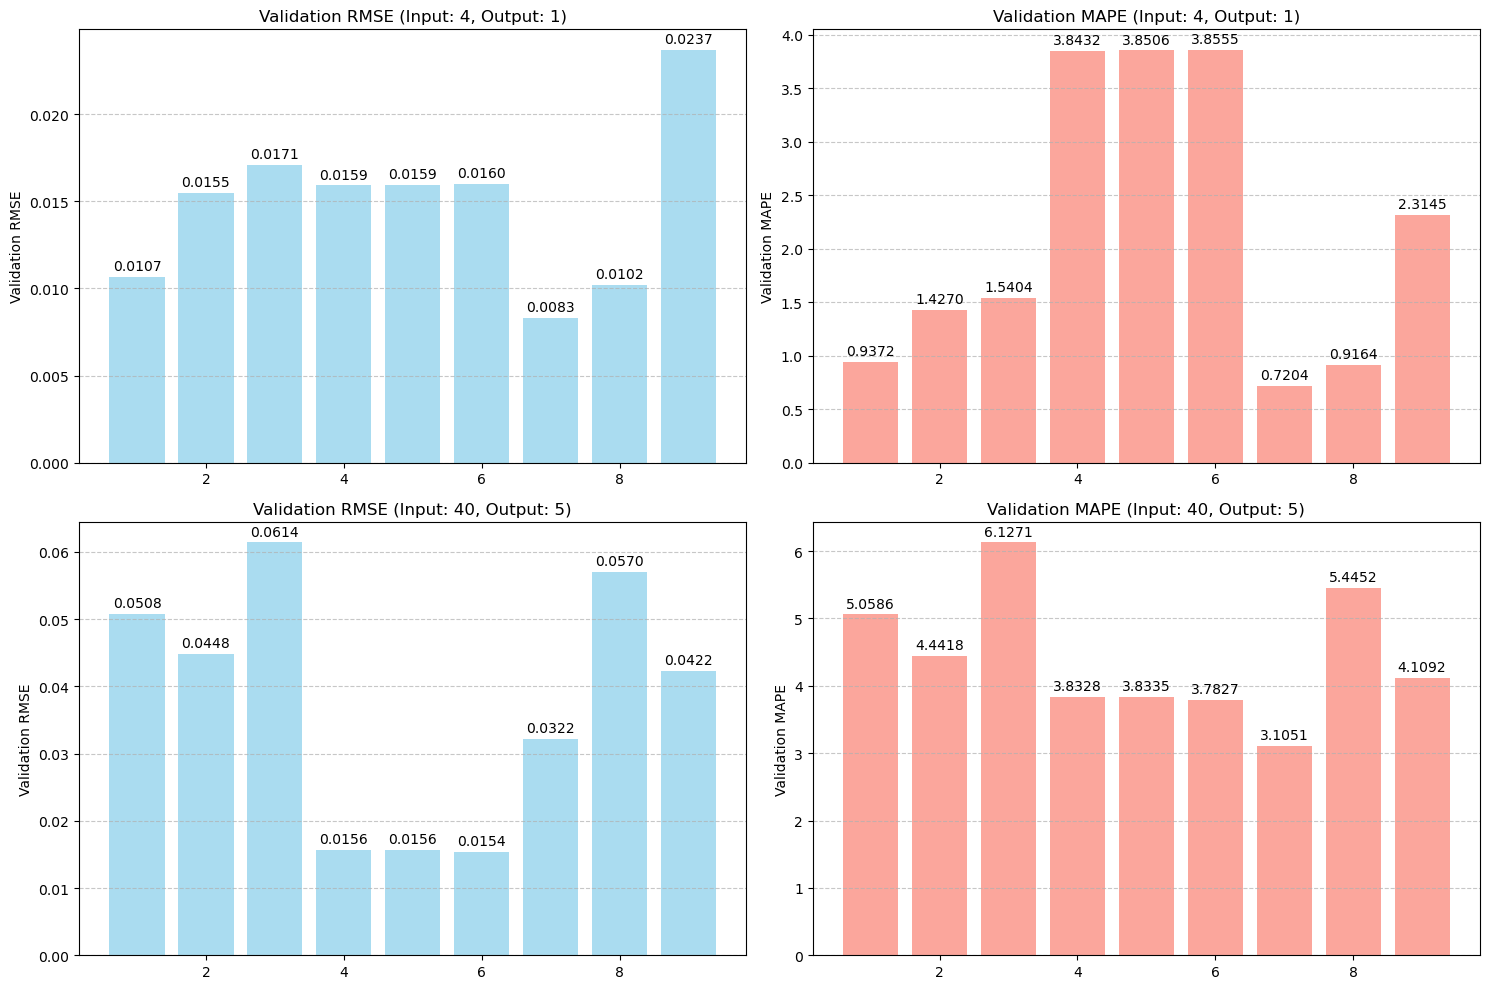

In [358]:
# Get unique combinations of Win_Input_Size and Win_Output_Size
unique_combinations = window_results_mean_df[['Win_Input_Size', 'Win_Output_Size']].drop_duplicates()

# Calculate the number of subplots needed
num_combinations = len(unique_combinations)
fig_height = 5 * num_combinations  # Adjust the height dynamically based on the number of combinations

# Create subplots
fig, axes = plt.subplots(num_combinations, 2, figsize=(15, fig_height), sharex=False)

# Iterate through each combination and plot
for idx, (win_input, win_output) in enumerate(unique_combinations.values):
    # Filter data for the current combination
    subset = window_results_mean_df[
        (window_results_mean_df['Win_Input_Size'] == win_input) &
        (window_results_mean_df['Win_Output_Size'] == win_output)
    ]
    
    # Plot Val_RMSE
    axes[idx, 0].bar(subset['Sub Experiment'], subset['Val_RMSE'], color='skyblue', alpha=0.7)
    axes[idx, 0].set_title(f'Validation RMSE (Input: {win_input}, Output: {win_output})')
    axes[idx, 0].set_ylabel('Validation RMSE')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Val_RMSE values as labels
    for i, value in enumerate(subset['Val_RMSE']):
        axes[idx, 0].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

    # Plot Val_MAPE
    axes[idx, 1].bar(subset['Sub Experiment'], subset['Val_MAPE'], color='salmon', alpha=0.7)
    axes[idx, 1].set_title(f'Validation MAPE (Input: {win_input}, Output: {win_output})')
    axes[idx, 1].set_ylabel('Validation MAPE')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Val_MAPE values as labels
    for i, value in enumerate(subset['Val_MAPE']):
        axes[idx, 1].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()


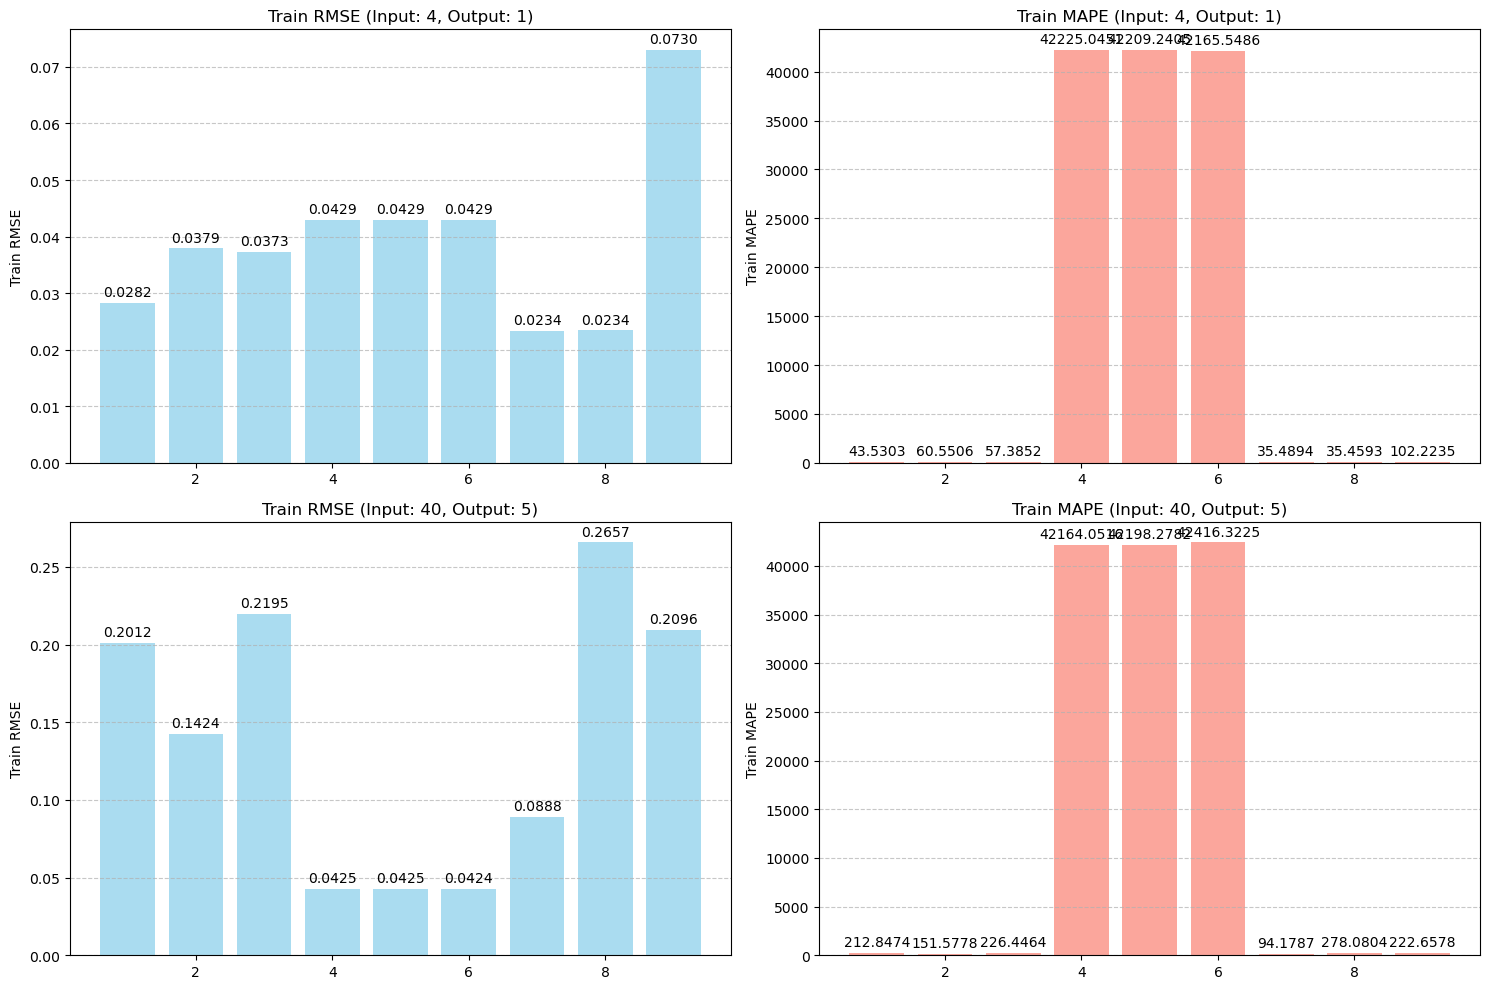

In [359]:
# Get unique combinations of Win_Input_Size and Win_Output_Size
unique_combinations = window_results_mean_df[['Win_Input_Size', 'Win_Output_Size']].drop_duplicates()

# Calculate the number of subplots needed
num_combinations = len(unique_combinations)
fig_height = 5 * num_combinations  # Adjust the height dynamically based on the number of combinations

# Create subplots
fig, axes = plt.subplots(num_combinations, 2, figsize=(15, fig_height), sharex=False)

# Iterate through each combination and plot
for idx, (win_input, win_output) in enumerate(unique_combinations.values):
    # Filter data for the current combination
    subset = window_results_mean_df[
        (window_results_mean_df['Win_Input_Size'] == win_input) &
        (window_results_mean_df['Win_Output_Size'] == win_output)
    ]
    
    # Plot Train_RMSE
    axes[idx, 0].bar(subset['Sub Experiment'], subset['Train_RMSE'], color='skyblue', alpha=0.7)
    axes[idx, 0].set_title(f'Train RMSE (Input: {win_input}, Output: {win_output})')
    axes[idx, 0].set_ylabel('Train RMSE')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Train_RMSE values as labels
    for i, value in enumerate(subset['Train_RMSE']):
        axes[idx, 0].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

    # Plot Train_MAPE
    axes[idx, 1].bar(subset['Sub Experiment'], subset['Train_MAPE'], color='salmon', alpha=0.7)
    axes[idx, 1].set_title(f'Train MAPE (Input: {win_input}, Output: {win_output})')
    axes[idx, 1].set_ylabel('Train MAPE')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add Train_MAPE values as labels
    for i, value in enumerate(subset['Train_MAPE']):
        axes[idx, 1].annotate(f"{value:.4f}", 
                              (subset['Sub Experiment'].iloc[i], value), 
                              textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()
